<a href="https://colab.research.google.com/github/SJinLee/BasicStats/blob/main/textmining-naver-news-category1-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(rvest)

In [ ]:
cat <- '정치'
caturl <- 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
catdata <- read_html(caturl)

In [ ]:
article_div <- html_nodes(x=catdata,xpath='//*[@class="sh_text"]')
article_div

{xml_nodeset (10)}
 [1] <div class="sh_text">\n                                        <a href=" ...
 [2] <div class="sh_text">\n                                        <a href=" ...
 [3] <div class="sh_text">\n                                        <a href=" ...
 [4] <div class="sh_text">\n                                        <a href=" ...
 [5] <div class="sh_text">\n                                        <a href=" ...
 [6] <div class="sh_text">\n                                        <a href=" ...
 [7] <div class="sh_text">\n                                        <a href=" ...
 [8] <div class="sh_text">\n                                        <a href=" ...
 [9] <div class="sh_text">\n                                        <a href=" ...
[10] <div class="sh_text">\n                                        <a href=" ...

In [ ]:
article_div[[1]]

{html_node}
<div class="sh_text">
[1] <a href="https://n.news.naver.com/mnews/article/422/0000601734?sid=100" c ...
[2] <div class="sh_text_lede">북한 발사체 잔해 인양 작전을 사흘째 펼치고 있는 우리 군이 오늘(2일) 잔해에 줄을 ...
[3] <div class="sh_text_info _rcount" data-comment="{gno:'news422,0000601734' ...

In [ ]:
article_link <- html_nodes(x=article_div[[1]],'a')
article_link

{xml_nodeset (2)}
[1] <a href="https://n.news.naver.com/mnews/article/422/0000601734?sid=100" c ...
[2] <a href="/main/clusterArticles.naver?id=c_202306021400_00000113&amp;mode= ...

In [ ]:
article_title <- html_text(article_link[[1]])
article_title

[1] "군, 사흘째 발사체 인양 작전…줄 묶는 작업 진행"

In [ ]:
article_url <- html_attr(x=article_link[[1]],'href')
article_url

[1] "https://n.news.naver.com/mnews/article/422/0000601734?sid=100"

In [ ]:
article_body <- read_html(article_url)
article_body

{html_document}
<html lang="ko" data-useragent="R (4.2.3 x86_64-pc-linux-gnu x86_64 linux-gnu)">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="n_news_mnews fs2 as_mp_layout">\n\t\t<div class="end_contain ...

In [ ]:
article_content <- html_nodes(x=article_body,
                              xpath='//*[@class="newsct_article _article_body"]'
                             )
article_content

{xml_nodeset (1)}
[1] <div id="newsct_article" class="newsct_article _article_body">\n\t\t<div  ...

In [ ]:
article_text <- html_text(article_content)
article_text

[1] "\n\t\t\n\t\t\t북한 발사체 잔해 인양 작전을 사흘째 펼치고 있는 우리 군이 오늘(2일) 잔해에 줄을 묶는 작업에 나섭니다.군 관계자는 \"오늘(2일) 오후 청해진함이 현장에 도착하면 포화 잠수를 실시해 동체 일부를 묶어 끌어올리기 위한 준비 작업을 진행할 예정\"이라고 밝혔습니다.앞서 우리 군은 지난달 31일 어청도 서쪽 200여㎞ 지점에서 발사체의 2단 부분으로 추정되는 길이 15m, 직경 2~3m인 잔해를 발견했습니다.당시엔 잔해 일부가 떠 있었으나 이후 수심 75m 바닥에 가라앉았습니다.조한대 기자 (onepunch@yna.co.kr)#발사체 #합참 #인양 연합뉴스TV 기사문의 및 제보 : 카톡/라인 jebo23\n\t"

In [ ]:
article_link <- lapply(article_div,function(x) {html_nodes(x=x,'a')[[1]]})
article_title <- lapply(article_link,html_text)
article_url <-  lapply(article_link,function(x) {html_attr(x=x,'href')})
article_body <- lapply(article_url,read_html)
article_content <- lapply(article_body,
                          function(x) {
                              html_nodes(x=x,
                                         xpath='//*[@class="newsct_article _article_body"]')
                          })
article_text <- lapply(article_content,html_text)
df_article <- data.frame(category=cat,
                       title=unlist(article_title),
                       url=unlist(article_url),
                       text=unlist(article_text))

In [ ]:
table(df_article[['category']])


정치 
  10 

### khaiii 사용법
1. install.packages("reticulate") 
2. library(reticulate) 
3. khaiii <- import('khaiii')
4. api <- khaiii$KhaiiiApi()

5. a <- api$analyze("데이터 분석을 공부하고 있는 개발자")

In [ ]:
library(reticulate)
khaiii <- import('khaiii')
api <- khaiii$KhaiiiApi()

In [ ]:
a <- api$analyze("데이터 분석을 공부하고 있는 개발자")

In [ ]:
for (word in a) {
    s <- paste(word$lex,": ",sep='')
    t <- unlist(Map(function(x){paste(x$lex,x$tag,sep='/')},word$morphs))
    s <- paste(s, paste(t,collapse=','),sep='')
    print(s)
}

[1] "데이터: 데이터/NNG"
[1] "분석을: 분석/NNG,을/JKO"
[1] "공부하고: 공부/NNG,하/XSV,고/EC"
[1] "있는: 있/VX,는/ETM"
[1] "개발자: 개발자/NNG"


<table> <thead> <tr> <th>분류</th> <th>품사</th> <th>설명</th> <th>분류</th> <th>품사</th> <th>설명</th> </tr> </thead> <tbody> <tr> <td>체언</td> <td>NNG</td> <td>일반 명사</td> <td>의존 형태</td> <td>EP</td> <td>선어말 어미</td> </tr> <tr> <td>체언</td> <td>NNP</td> <td>고유 명사</td> <td>의존 형태</td> <td>EF</td> <td>종결 어미</td> </tr> <tr> <td>체언</td> <td>NNB</td> <td>의존 명사</td> <td>의존 형태</td> <td>EC</td> <td>연결 어미</td> </tr> <tr> <td>체언</td> <td>NP</td> <td>대명사</td> <td>의존 형태</td> <td>ETN</td> <td>명사형 전성 어미</td> </tr> <tr> <td>체언</td> <td>NR</td> <td>수사</td> <td>의존 형태</td> <td>ETM</td> <td>관형형 전성 어미</td> </tr> <tr> <td>용언</td> <td>VV</td> <td>동사</td> <td>의존 형태</td> <td>XPN</td> <td>체언 접두사</td> </tr> <tr> <td>용언</td> <td>VA</td> <td>형용사</td> <td>의존 형태</td> <td>XSN</td> <td>명사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VX</td> <td>보조 용언</td> <td>의존 형태</td> <td>XSV</td> <td>동사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VCP</td> <td>긍정 지정사</td> <td>의존 형태</td> <td>XSA</td> <td>형용사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VCN</td> <td>부정 지정사</td> <td>의존 형태</td> <td>XR</td> <td>어근</td> </tr> <tr> <td>수식언</td> <td>MM</td> <td>관형사</td> <td>기호</td> <td>SF</td> <td>마침표, 물음표, 느낌표</td> </tr> <tr> <td>수식언</td> <td>MAG</td> <td>일반 부사</td> <td>기호</td> <td>SP</td> <td>쉼표, 가운뎃점, 콜론, 빗금</td> </tr> <tr> <td>수식언</td> <td>MAJ</td> <td>접속 부사</td> <td>기호</td> <td>SS</td> <td>따옴표, 괄호표, 줄표</td> </tr> <tr> <td>독립언</td> <td>IC</td> <td>감탄사</td> <td>기호</td> <td>SE</td> <td>줄임표</td> </tr> <tr> <td>관계언</td> <td>JKS</td> <td>주격 조사</td> <td>기호</td> <td>SO</td> <td>붙임표(물결, 숨김, 빠짐)</td> </tr> <tr> <td>관계언</td> <td>JKC</td> <td>보격 조사</td> <td>기호</td> <td>SL</td> <td>외국어</td> </tr> <tr> <td>관계언</td> <td>JKG</td> <td>관형격 조사</td> <td>기호</td> <td>SH</td> <td>한자</td> </tr> <tr> <td>관계언</td> <td>JKO</td> <td>목적격 조사</td> <td>기호</td> <td>SW</td> <td>기타 기호(논리, 수학 기호, 화폐 기호 등)</td> </tr> <tr> <td>관계언</td> <td>JKB</td> <td>부사격 조사</td> <td>기호</td> <td><strong>SWK</strong></td> <td>한글 자소</td> </tr> <tr> <td>관계언</td> <td>JKV</td> <td>호격 조사</td> <td>기호</td> <td>SN</td> <td>숫자</td> </tr> <tr> <td>관계언</td> <td>JKQ</td> <td>인용격 조사</td> <td>추정</td> <td><strong>ZN</strong></td> <td>분석 불능(명사 추정)</td> </tr> <tr> <td>관계언</td> <td>JX</td> <td>보조사</td> <td>추정</td> <td><strong>ZV</strong></td> <td>분석 불능(용언 추정)</td> </tr> <tr> <td>관계언</td> <td>JC</td> <td>접속 조사</td> <td>추정</td> <td><strong>ZZ</strong></td> <td>분석 불능(기타)</td> </tr> </tbody> </table>

In [ ]:
extractNoun <- function(txt) {
    a = api$analyze(txt)
    noun <- c()
    for (token in a) {
        tags <- unlist(Map(function(x){x$tag},token$morphs))
        lexs <- unlist(Map(function(x){x$lex},token$morphs))
        noun <- c(noun,lexs[tags=='NNG'])
    }
    paste(noun,collapse=' ')
}

In [ ]:
nouns <- Map(extractNoun,df_article[['text']]) 

In [ ]:
library(tm)

Loading required package: NLP



In [ ]:
source <- VectorSource(nouns)

In [ ]:
corpus <- VCorpus(source)

In [ ]:
tdm <- TermDocumentMatrix(corpus)

In [ ]:
m <- as.matrix(tdm)

In [ ]:
freqs <- rowSums(m)

In [ ]:
freqs <- sort(freqs,decreasing=T)

In [ ]:
length(freqs)

[1] 115

In [ ]:
freqs[1:10]

선관위   대통령   감사원   공무원   보훈부 사무총장 감사원법   국무부 
      28       18       16       10        6        6        5        5 
  대변인   외교부 
       5        5

In [ ]:
library(wordcloud)

Loading required package: RColorBrewer



In [ ]:
library(repr)

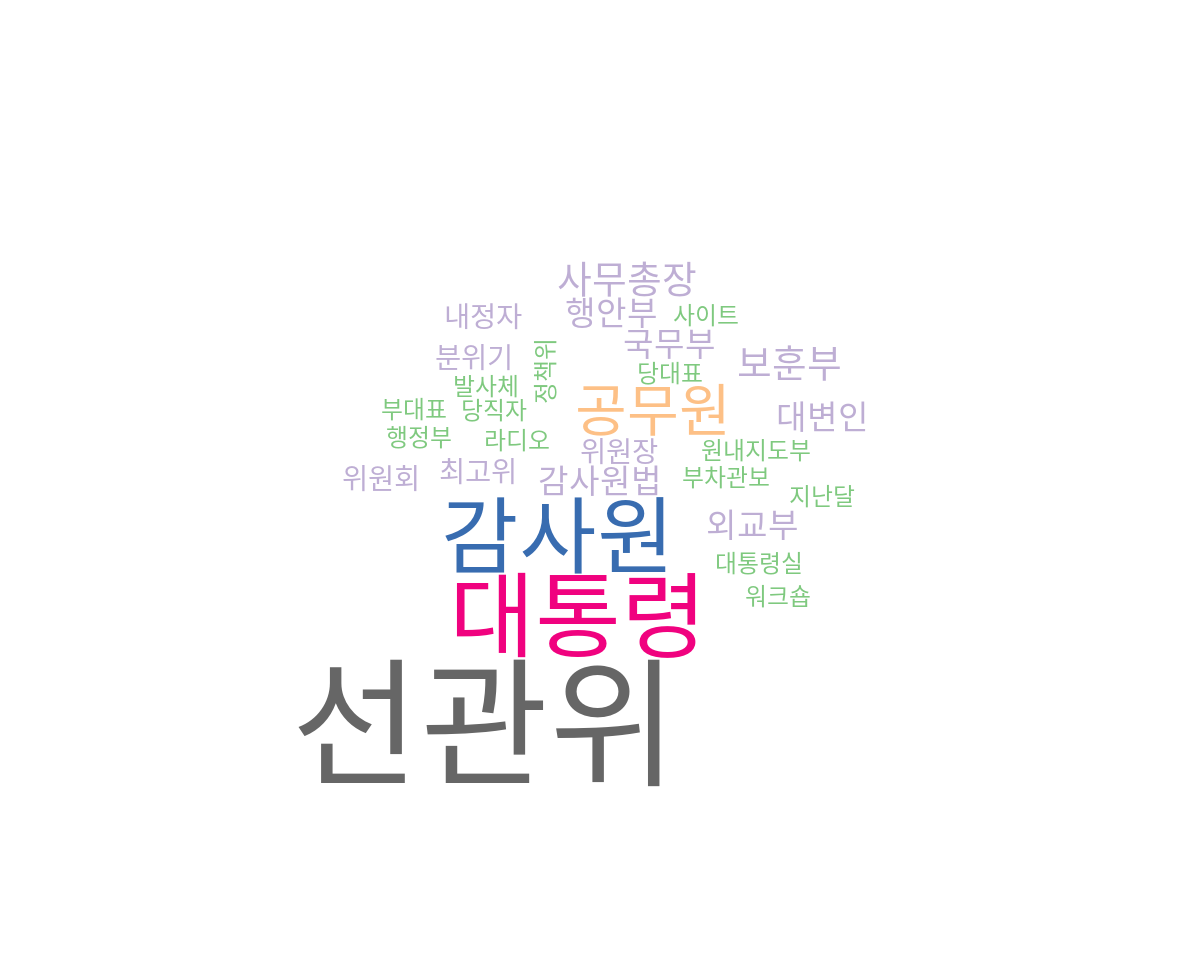

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
pal<-brewer.pal(8, "Accent")
wordcloud(names(freqs), freqs, max.words=120, scale=c(7, 0.5), colors=pal)